In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

%matplotlib inline

In [2]:
df_gn = pd.read_csv('dataset_cluster.csv',sep='|')
df_gn.drop(columns='Unnamed: 0',inplace=True)

In [3]:
df_gn['AREA_CODE'] = df_gn['AREA_CODE'].astype(str)

In [4]:
ls_c_aux = df_gn.select_dtypes(include=['float64','int64']).columns.tolist()

In [23]:
ls_c_aux

['ACCT_LENGTH',
 'NUM_EMAILMESSG',
 'TOTAL_DAY_MINUTES',
 'TOTAL_DAY_CALLS',
 'TOTAL_DAY_CHARGE',
 'TOTAL_EVE_MINUTES',
 'TOTAL_EVE_CALLS',
 'TOTAL_EVE_CHARGE',
 'TOTAL_NIGHT_MINUTES',
 'TOTAL_NIGHT_CALLS',
 'TOTAL_NIGHT_CHARGE',
 'TOTAL_INTL_MINUTES',
 'TOTAL_INTL_CALLS',
 'TOTAL_INTL_CHARGE',
 'NUM_CUSTSERV_CALLS',
 'TOTAL_DAY_CALLS/TOTAL_EVE_CALLS',
 'TOTAL_NIGHT_MINUTES/TOTAL_EVE_CALLS',
 'TOTAL_INTL_CHARGE/TOTAL_EVE_CALLS',
 'TOTAL_EVE_MINUTES/TOTAL_EVE_CALLS',
 'TOTAL_EVE_CHARGE/TOTAL_EVE_CALLS',
 'TOTAL_NIGHT_CALLS/TOTAL_EVE_CALLS',
 'TOTAL_DAY_CHARGE/TOTAL_EVE_CALLS',
 'TOTAL_NIGHT_CHARGE/TOTAL_EVE_CALLS',
 'TOTAL_INTL_CALLS/TOTAL_EVE_CALLS',
 'TOTAL_INTL_MINUTES/TOTAL_EVE_CALLS',
 'NUM_EMAILMESSG/TOTAL_EVE_CALLS',
 'ACCT_LENGTH/TOTAL_EVE_CALLS',
 'NUM_CUSTSERV_CALLS/TOTAL_EVE_CALLS',
 'TOTAL_DAY_MINUTES/TOTAL_EVE_CALLS',
 'TOTAL_EVE_CALLS/TOTAL_DAY_CALLS',
 'TOTAL_NIGHT_MINUTES/TOTAL_DAY_CALLS',
 'TOTAL_INTL_CHARGE/TOTAL_DAY_CALLS',
 'TOTAL_EVE_MINUTES/TOTAL_DAY_CALLS',
 'TOTA

In [24]:
ls_c = ['TOTAL_DAY_CHARGE/TOTAL_DAY_CALLS','NUM_CUSTSERV_CALLS','TOTAL_INTL_MINUTES/TOTAL_INTL_CALLS',
'TOTAL_INTL_CALLS','TOTAL_INTL_CHARGE/TOTAL_INTL_CALLS']

In [25]:
aux  = [x for x in ls_c if '/' not in x]

In [26]:
mm         = MinMaxScaler()
sc         = StandardScaler()
pca        = PCA(n_components=2)
mds        = MDS(n_components=2)
X          = df_gn[ls_c]
mm.fit(X)
sc.fit(X)

Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)
Xs  = pd.DataFrame(sc.transform(X),columns=X.columns)

[0.51521304 0.71578373]


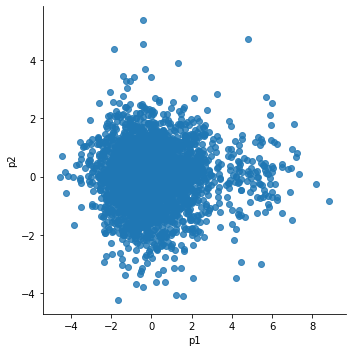

In [27]:


pca.fit(Xs)
print(pca.explained_variance_ratio_.cumsum())
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

[0.51521304 0.71578373]


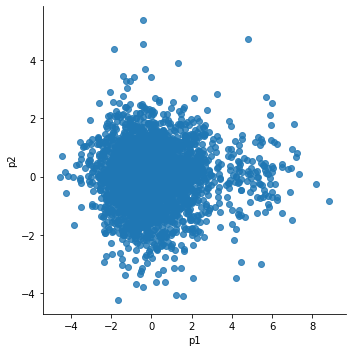

In [28]:
pca.fit(Xs)
print(pca.explained_variance_ratio_.cumsum())
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

### K-MEANS

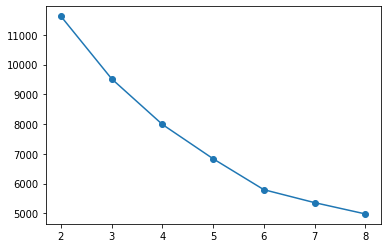

In [29]:
lst_in =[]
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

plt.plot(range(2,9),lst_in,marker='o')

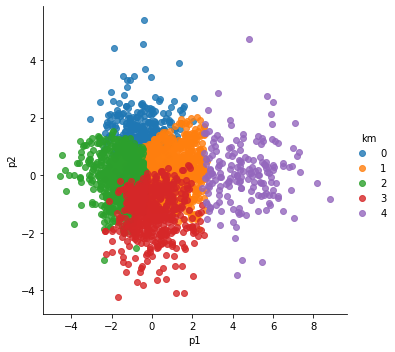

In [30]:
km = KMeans(n_clusters=5)

km.fit(Xs)

Xs['km']=km.predict(Xs)

Xp['km'] = Xs['km']

sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='km')

[0.51983526 0.78393159]


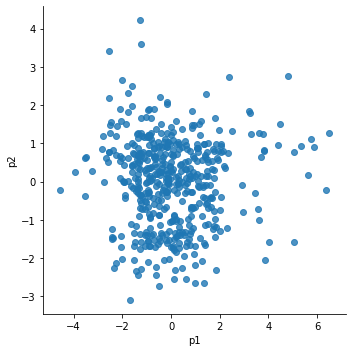

In [31]:
X          = df_gn[df_gn['CHURN']==True][ls_c]
mm.fit(X)
sc.fit(X)

Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)
Xs  = pd.DataFrame(sc.transform(X),columns=X.columns)

pca.fit(Xs)
print(pca.explained_variance_ratio_.cumsum())
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

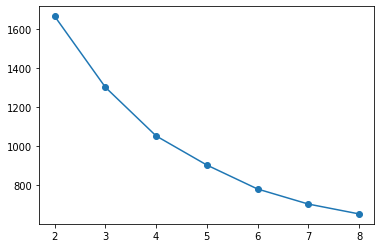

In [32]:
lst_in =[]
for k in range(2,9):
    km = KMeans(n_clusters=k)
    km.fit(Xs)
    lst_in.append(km.inertia_)

plt.plot(range(2,9),lst_in,marker='o')

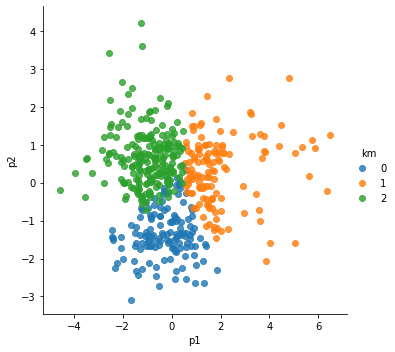

In [33]:
km = KMeans(n_clusters=3)

km.fit(Xs)

Xs['km'] = Xp['km'] = X['km'] = km.predict(Xs)


sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='km')

In [34]:
ls_c[0]

'TOTAL_DAY_CHARGE/TOTAL_DAY_CALLS'

In [44]:
df_km = X.groupby(['km']).mean()

In [40]:
df_km['Descripción'] = ['''Cargos promedio al día por llamadas es del 0.26,
                    tiene un promedio de 4.4 llamadas a servicio al cliente, la duración promedio
                    de sus llamadas internacionales es de casi 3 minutos y tiene un poco más de 4 llamadas
                    internacionales en promedio, sus cargos en llamadas internacionales son de 0.75 en promedio''',
                   '''Promedio de cargos por llamadas es casi de 0.34, tiene casi 2 llamadas en promedio
                   hacia servicio al cliente, sus llamadas internacionales duran en promedio 6.5 minutos y
                   los cargos promedio por llamadas rebasan al 1.75.''',
                   '''Los cargos promedio por llamada son de casi 0.5 por llamadas, tiene únicamente
                   una llamada en promedio hacia servicio al cliente, la duración de llamadas internacionales
                   son de 2.2 minutos en promedio y tiene casi 6 llamadas internacionales con cargos
                   promedio de 0.6.''']

In [45]:
df_km['NOMBRE_km'] = ['Clientes sin solución a sus quejas','Clientes con altos cargos a llamadas internacionales',
                     'Clientes que no están dispuestos a pagar cargos']

In [46]:
df_km

,TOTAL_DAY_CHARGE/TOTAL_DAY_CALLS,NUM_CUSTSERV_CALLS,TOTAL_INTL_MINUTES/TOTAL_INTL_CALLS,TOTAL_INTL_CALLS,TOTAL_INTL_CHARGE/TOTAL_INTL_CALLS,NOMBRE_km
km,,,,,,
0,0.264732,4.401460,2.803078,4.248175,0.756911,Clientes sin solución a sus quejas
1,0.343916,1.738462,6.564103,1.907692,1.772474,Clientes con altos cargos a llamadas internaci...
2,0.441424,1.134884,2.224348,5.488372,0.600728,Clientes que no están dispuestos a pagar cargos


### Gaussian Mixture

In [199]:
gmm = GaussianMixture(n_components=3)

In [200]:
gmm.fit(Xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [204]:
Xs['km'] = Xp['km'] = X['gm'] = gmm.predict(Xs)

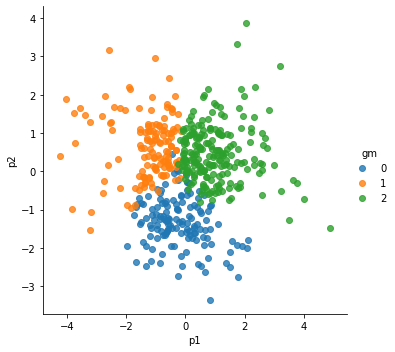

In [205]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='gm')

In [206]:
X.groupby(['km']).describe()

TOTAL_DAY_CHARGE/TOTAL_DAY_CALLS                                          \
                              count      mean       std       min       25%   
km                                                                            
0                             206.0  0.447380  0.161131  0.067750  0.350495   
1                             139.0  0.259912  0.094373  0.076058  0.198382   
2                             137.0  0.347412  0.133111  0.091124  0.259865   

                                 NUM_CUSTSERV_CALLS                           \
         50%       75%       max              count      mean       std  min   
km                                                                             
0   0.421634  0.517171  1.150000              206.0  1.169903  0.975438  0.0   
1   0.245778  0.309648  0.679545              139.0  4.460432  1.211456  2.0   
2   0.346698  0.431810  0.990682              137.0  1.547445  1.403623  0.0   

                       TOTAL_INTL_MINUTES/TOTAL_INTL_CALLS            \
    25%  50%  75%  max                               count      mean   
km                                                                     
0   0.0  1.0  2.0  4.0                               206.0  2.167103   
1   4.0  4.0  5.0  9.0                               139.0  2.921043   
2   0.0  1.0  2.0  6.0                               137.0  6.300304   

                                                           TOTAL_INTL_CALLS  \
         std       min       25%     50%       75%     max            count   
km                                                                            
0   0.827085  0.300000  1.557857  2.0775  2.800000   4.325            206.0   
1   1.325774  0.433333  1.795000  2.8000  3.829167   6.150            139.0   
2   2.593956  2.150000  4.700000  5.5500  6.900000  15.200            137.0   

                                                     gm                      \
        mean       std  min  25%  50%  75%   max  count mean  std  min  25%   
km                                                                            
0   5.621359  2.623037  2.0  4.0  5.0  7.0  20.0  206.0  2.0  0.0  2.0  2.0   
1   4.179856  2.022525  2.0  3.0  4.0  5.0  11.0  139.0  0.0  0.0  0.0  0.0   
2   1.978102  0.669363  1.0  2.0  2.0  2.0   4.0  137.0  1.0  0.0  1.0  1.0   

                   
    50%  75%  max  
km                 
0   2.0  2.0  2.0  
1   0.0  0.0  0.0  
2   1.0  1.0  1.0